In [1]:
from lib.data.cityscapes import CityscapesDataset

ds = CityscapesDataset(
    root="data/cityscapes",
    split="train",
    train_size=(1024, 1024),
    val_size=(1024, 2048),
    mean=(0.485, 0.456, 0.406),
    std=(0.229, 0.224, 0.225),
    ignore_index=255,
    bbox_format="pascal_voc",
    logger=None,
)

/home/mars/miniconda3/envs/paper/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/mars/miniconda3/envs/paper/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


/home/mars/paper/lib/data/cityscapes.py:290: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bboxes = torch.tensor(bboxes, dtype=torch.float32)


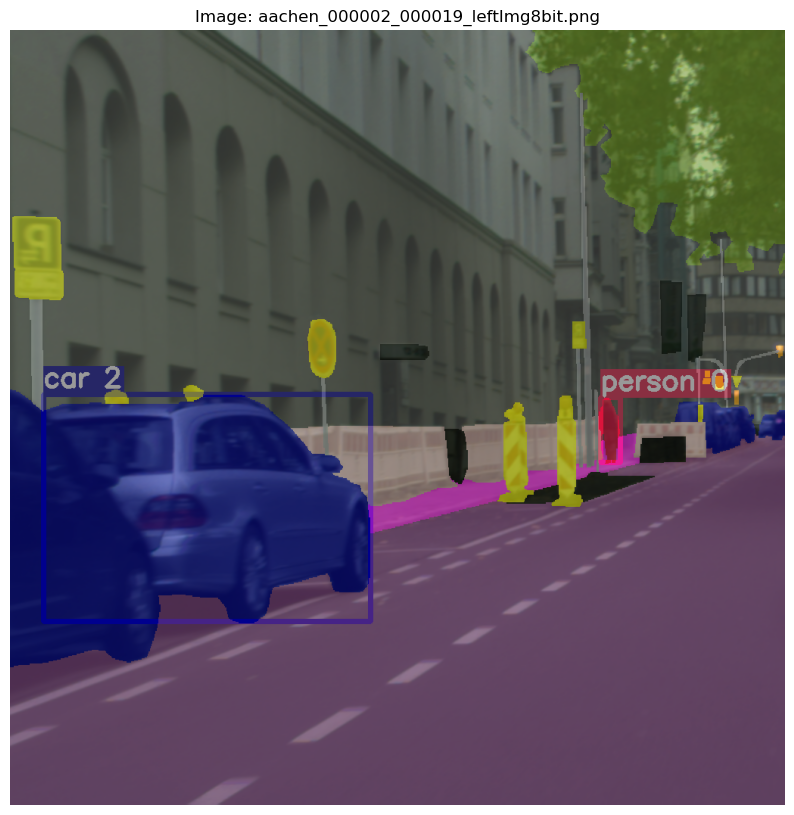

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def process_image(image, ds):
    image = (image.transpose(1, 2, 0) * np.array(ds.std) + np.array(ds.mean)) * 255
    image = image.astype(np.uint8)
    return image


def process_mask(seg_mask, ds):
    colored_mask = np.zeros((*image.shape[:2], 3), dtype=np.uint8)
    for id, color in enumerate(ds.COLOR_PALETTE):
        colored_mask[seg_mask == id] = ds.COLOR_PALETTE[color]
    return colored_mask


def process_bboxes(image, targets, ds):
    for idx, bbox in enumerate(targets["bboxes"]):
        bbox = bbox.numpy().astype(np.int32)
        label = (
            ds.LOCALIZATION_CLASSES[targets["labels"][idx].item()]
            + " "
            + str(targets["labels"][idx].item())
        )
        color = ds.COLOR_PALETTE[11 + targets["labels"][idx].item()]

        image = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 5)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
        image = cv2.rectangle(
            image, (bbox[0], bbox[1] - h - 10), (bbox[0] + w, bbox[1]), color, -1
        )
        image = cv2.putText(
            image,
            label,
            (bbox[0], bbox[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.2,
            [255, 255, 255],
            3,
        )
    return image


targets = ds[2]
image = process_image(targets["image"].numpy(), ds)
seg_mask = targets["mask"].numpy().astype(np.uint8)
colored_mask = process_mask(seg_mask, ds)
image = process_bboxes(image.copy(), targets, ds)

plt.figure(figsize=(10, 20))
plt.title(f"Image: {targets['info']['name']}")
plt.imshow(image)
plt.imshow(colored_mask, alpha=0.55)
plt.axis("off")
plt.show()

In [3]:
targets.keys()

dict_keys(['image', 'bboxes', 'labels', 'mask', 'heatmap', 'info'])

In [4]:
targets["heatmap"].shape

torch.Size([8, 1024, 1024])

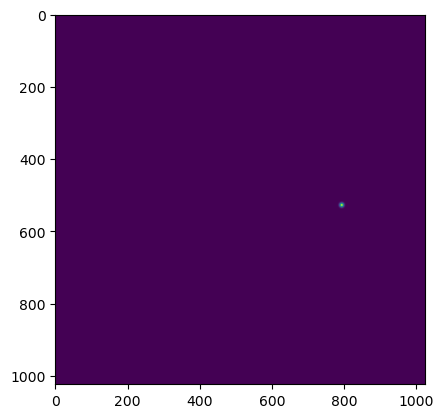

In [6]:
plt.imshow(targets["heatmap"][0])